<a href="https://colab.research.google.com/github/aryacodez/ML-Crate/blob/main/bird_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Dense, Flatten,GlobalAveragePooling2D
import os
import warnings
warnings.filterwarnings('ignore')

# Loading data into Tensorflow and Visualization

In [10]:
IMAGE_SIZE = [224,224]
BS = 32

In [11]:
train='/content/train'
test='/content/test'
val='/content/valid'

In [12]:
datagen = ImageDataGenerator(zoom_range= 0.2,                             
                             horizontal_flip= True,                             
                             rescale= 1./255,
                             shear_range = 0.2)

In [13]:
train_gen = datagen.flow_from_directory(train,
                                   color_mode='rgb',
                                   class_mode='categorical',
                                   batch_size=BS,
                                   target_size=IMAGE_SIZE)

Found 50944 images belonging to 350 classes.


In [14]:
valid_gen = datagen.flow_from_directory(val,
                                   color_mode='rgb',
                                   class_mode='categorical',
                                   batch_size=BS,
                                   target_size=IMAGE_SIZE)

Found 1750 images belonging to 350 classes.


In [15]:
datagen1 = ImageDataGenerator(rescale= 1./255)

test_gen = datagen1.flow_from_directory(test,
                                   color_mode='rgb',
                                   class_mode='categorical',
                                   batch_size=BS,
                                   target_size=IMAGE_SIZE)

Found 1750 images belonging to 350 classes.


In [16]:
classes = train_gen.class_indices
classes

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'ALBATROSS': 7,
 'ALBERTS TOWHEE': 8,
 'ALEXANDRINE PARAKEET': 9,
 'ALPINE CHOUGH': 10,
 'ALTAMIRA YELLOWTHROAT': 11,
 'AMERICAN AVOCET': 12,
 'AMERICAN BITTERN': 13,
 'AMERICAN COOT': 14,
 'AMERICAN GOLDFINCH': 15,
 'AMERICAN KESTREL': 16,
 'AMERICAN PIPIT': 17,
 'AMERICAN REDSTART': 18,
 'AMETHYST WOODSTAR': 19,
 'ANDEAN GOOSE': 20,
 'ANDEAN LAPWING': 21,
 'ANDEAN SISKIN': 22,
 'ANHINGA': 23,
 'ANIANIAU': 24,
 'ANNAS HUMMINGBIRD': 25,
 'ANTBIRD': 26,
 'ANTILLEAN EUPHONIA': 27,
 'APAPANE': 28,
 'APOSTLEBIRD': 29,
 'ARARIPE MANAKIN': 30,
 'ASHY THRUSHBIRD': 31,
 'ASIAN CRESTED IBIS': 32,
 'AZURE JAY': 33,
 'AZURE TANAGER': 34,
 'AZURE TIT': 35,
 'BAIKAL TEAL': 36,
 'BALD EAGLE': 37,
 'BALD IBIS': 38,
 'BALI STARLING': 39,
 'BALTIMORE ORIOLE': 40,
 'BANANAQUIT': 41,
 'BAND TAILED GUAN': 42,
 'BAND

**finding datatype and shape of the dataset**

In [17]:
for img,label in train_gen:
    print(img.dtype)
    print(img.shape)
    break

float32
(32, 224, 224, 3)


In [18]:
Total_categories = len(os.listdir(train))
Total_categories

350

**Plotting the no.of each classes in the dataset**

In [19]:
file = {}
for i in os.listdir(train):
    file[i] = len(os.listdir(train + '/' + i))

Text(0, 0.5, 'No. of images')

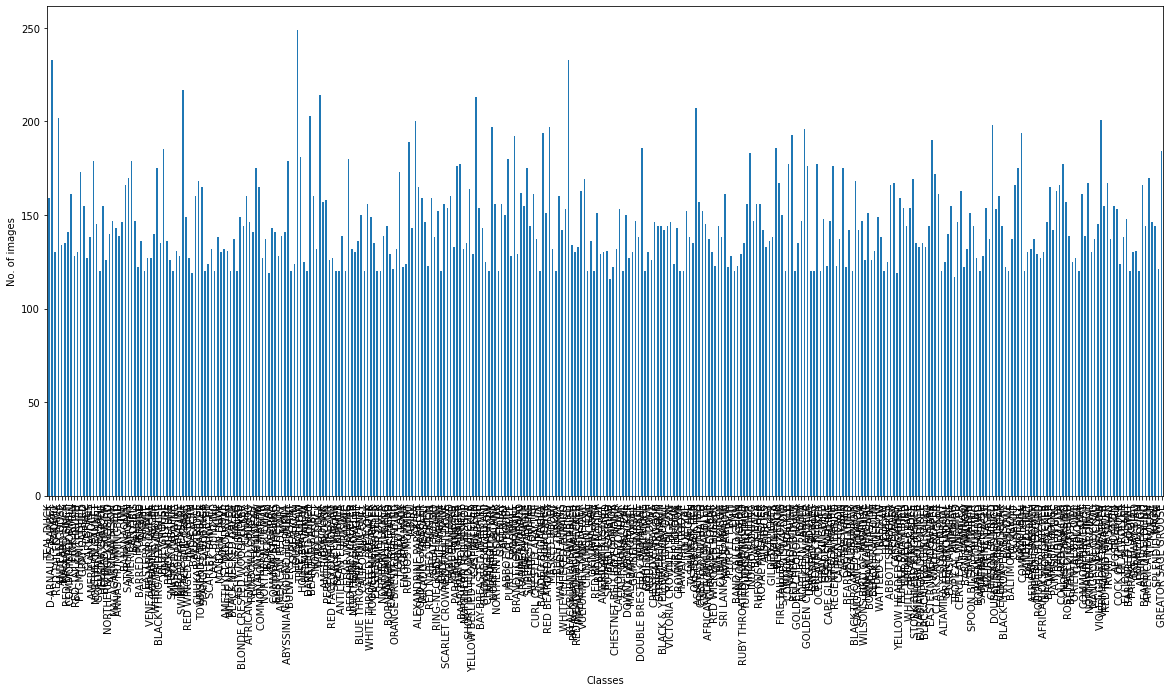

In [20]:
data_df = pd.Series(file)
plt.figure(figsize=(20,9))
data_df.plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('No. of images')

**Listing the classes in the dataset**

In [21]:
classes = list(train_gen.class_indices.keys())
classes

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'AMETHYST WOODSTAR',
 'ANDEAN GOOSE',
 'ANDEAN LAPWING',
 'ANDEAN SISKIN',
 'ANHINGA',
 'ANIANIAU',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ANTILLEAN EUPHONIA',
 'APAPANE',
 'APOSTLEBIRD',
 'ARARIPE MANAKIN',
 'ASHY THRUSHBIRD',
 'ASIAN CRESTED IBIS',
 'AZURE JAY',
 'AZURE TANAGER',
 'AZURE TIT',
 'BAIKAL TEAL',
 'BALD EAGLE',
 'BALD IBIS',
 'BALI STARLING',
 'BALTIMORE ORIOLE',
 'BANANAQUIT',
 'BAND TAILED GUAN',
 'BANDED BROADBILL',
 'BANDED PITA',
 'BANDED STILT',
 'BAR-TAILED GODWIT',
 'BARN OWL',
 'BARN SWALLOW',
 'BARRED PUFFBIRD',
 'BARROWS GOLDENEYE',
 'BAY-BREASTED WARBL

# Using DenseNet201

In [22]:
from tensorflow.keras.applications import DenseNet201

**Importing DenseNet201 Model**

In [23]:
base = DenseNet201(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

74850304/74836368 [==============================] - 3s 0us/step


In [24]:
for layer in base.layers[:180]:
        layer.trainable = False
for layer in base.layers[180:]:
        layer.trainable = True 

In [25]:
x = base.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(350, activation='softmax')(x)
model = Model(inputs=base.input, outputs=predictions)

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

**DenseNet201 Architecture**

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.133511 to fit



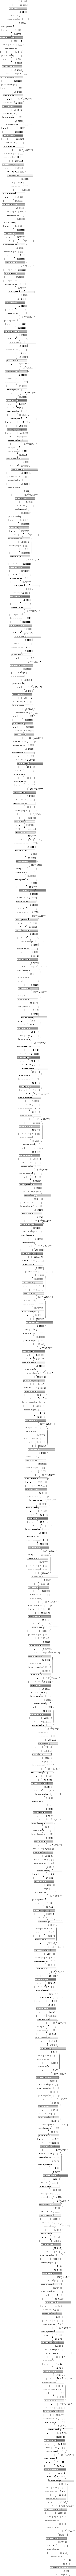

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file="Bird_Image_Model.png",show_shapes=True,show_dtype=True,dpi=300)

**Compiling and Fitting the dataset on the model**

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [28]:
history = model.fit(train_gen, epochs=7, batch_size=32, validation_data=valid_gen)

Epoch 1/7
1592/1592 [==============================] - 1347s 825ms/step - loss: 1.8238 - accuracy: 0.5751 - val_loss: 0.6794 - val_accuracy: 0.8074
Epoch 2/7
1592/1592 [==============================] - 1300s 816ms/step - loss: 0.5827 - accuracy: 0.8385 - val_loss: 0.3309 - val_accuracy: 0.9069
Epoch 3/7
1592/1592 [==============================] - 1296s 814ms/step - loss: 0.4081 - accuracy: 0.8849 - val_loss: 0.2777 - val_accuracy: 0.9206
Epoch 4/7
1592/1592 [==============================] - 1297s 815ms/step - loss: 0.3246 - accuracy: 0.9078 - val_loss: 0.2175 - val_accuracy: 0.9303
Epoch 5/7
1592/1592 [==============================] - 1288s 809ms/step - loss: 0.2691 - accuracy: 0.9232 - val_loss: 0.2361 - val_accuracy: 0.9297
Epoch 6/7
1592/1592 [==============================] - 1270s 798ms/step - loss: 0.2270 - accuracy: 0.9323 - val_loss: 0.2553 - val_accuracy: 0.9360
Epoch 7/7
1592/1592 [==============================] - 1269s 797ms/step - loss: 0.1980 - accuracy: 0.9409 - val_

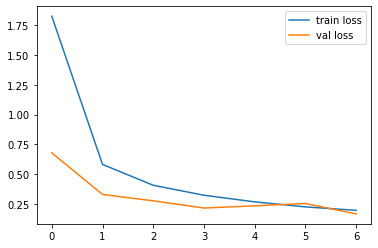

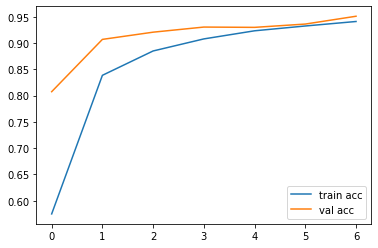

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
model.predict(test_gen)

array([[4.9760970e-11, 1.7283345e-15, 2.0959595e-20, ..., 1.0765809e-12,
        1.1379002e-17, 1.5800849e-15],
       [7.4043356e-08, 5.2316561e-16, 1.1892084e-13, ..., 2.4727779e-08,
        1.0385624e-13, 7.9661738e-13],
       [1.5115845e-13, 6.9893546e-19, 3.9585439e-19, ..., 7.7022579e-13,
        4.1207633e-17, 4.9883985e-13],
       ...,
       [1.2426880e-23, 3.7435822e-19, 7.7255495e-21, ..., 1.6530831e-17,
        5.0471162e-13, 4.5346819e-18],
       [7.1677190e-26, 2.9852147e-19, 4.2861055e-17, ..., 1.1624845e-28,
        1.2648083e-15, 9.9858397e-27],
       [3.3717410e-14, 1.5527613e-14, 2.5313724e-23, ..., 1.1872978e-11,
        3.3962568e-13, 7.3710237e-14]], dtype=float32)

In [31]:
model.evaluate(test_gen)

55/55 [==============================] - 19s 337ms/step - loss: 0.1446 - accuracy: 0.9577


[0.1445559412240982, 0.9577142596244812]

**Running inference on test data**

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


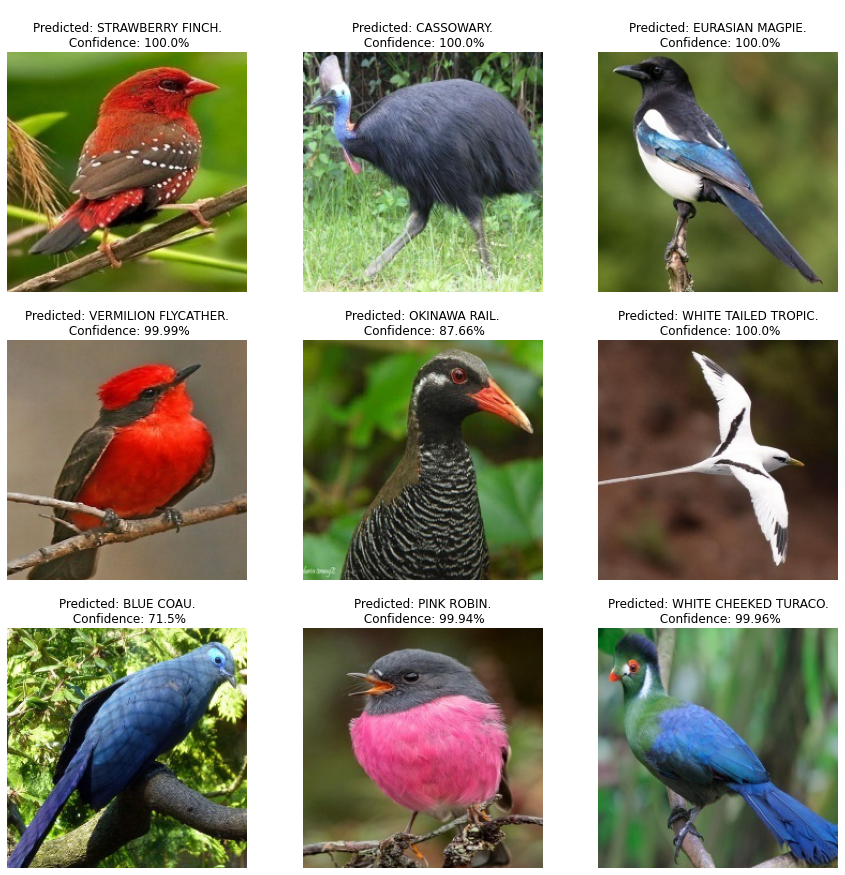

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_gen:
    labels=labels.flatten()
    for i in range(9):
        print(labels[i])
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = classes[int(labels[i])] 
        
        plt.title(f"\nPredicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

**Saving the model**

In [34]:
model.save('bird_model.h5')